# Business Data Analytics and Prediction

## Lesson 1.2 End to End Project in Python: Housing Prices


In [13]:
# Used for development stages
DEBUG_MODE = True

In [14]:
#Eilon - used for development stage - I need to set my working directory manually
EILON_SET_WORK_DIR = True
if (not EILON_SET_WORK_DIR):
# Now change the directory
    import os
    os.chdir("C:/Users/bareilon/Documents/מסמכים/MBA/בינתחומי BIG DATA/Mini Semester 1/יסודות האנליזה העסקית/exercises/IDC-BDA-Exercises")

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 1. Business objectives and targets

#### Business objective: 


### 2. Read, explore and prepare data

#### 2.1. Download and read the data

The dataset is taken from a Kagggle competition:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Read the csv file to a data frame
Note that the data is already split to train and test files.

In [17]:
df = pd.read_csv("Data/train.csv")

#### 2.2. Taking a quick look at the data 
Using the functions: 
* head
* info 
* describe


1. The prediction target (y) is the SalePrice column.
2. Data manipulation - we are going to drop all the categorical columns, as we don'tknow how to handle them yet.
3. We will handle some missing data

In [18]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [20]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 2.3. Exploratory data analytics


Data exploration is required to understand what is your data, and which preparations are required on it. A common visualization is a histogram. Use histogram to understand the values distribution, because many statistical model assume normal distribution.

In [21]:
if (not DEBUG_MODE):
    df.hist(bins = 25, figsize = (20,15)) #Check the hist parameters by clicking on the Tab completion. 
    plt.show()

In [22]:
if (not DEBUG_MODE):
    df.LotArea[df['LotArea'] < 5000].hist(bins = 50, figsize = (10,5)) #Check the hist parameters by clicking on the Tab completion. 
    plt.show()

#### 2.4. Data manipulations

After we looked at the data we can prepare it to analysis. 

From understanding the histograms, and talking with experts we might decide to drop or change columns, or to split the data by rows. 

For example: 

...

An option that we will take here to handle this is:
1. Take out the few rows and put them aside for separate handling
2. Drop this predictor from data

(Note that after the data manipulation you can rerun the describe or histogram above to see changes)

In [23]:
# Drop all Categorical columns
drop_cols = df.select_dtypes(include='object').columns
df = df.drop(drop_cols, axis = 1)

# Drop these columns as they are missing values
df = df.drop(['Id', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis = 1)

Typically data scientists continue back and forth between diffrent data visualizations and manipulations, but for this exercise we will stop here. We will dive more to this on next lesson.

In [24]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 2.5. Categorical values

Data manipulations require also handling of categorical data, and transforming it to be numerical. In our example, 'work_accident' and 'sales' are categorical that already appear as numerical. However, 'sales' and 'salary' are categorical with non-numeric data. We will learn how to handle such variables on next lesson, for now, lets just remove these columns.

You can learn more on the drop function in pandas, in: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

#### 2.6. Transform the data to matrix of X and y, spliting to Train and Test

Let's now prepae to modeling:
1. Split between X the predictors and y the target
2. Turn from data frame to matrix
3. Split X and y to train data set and test data set, with matching indexes between X and y


In [25]:
# 1. Split between X the predictors and y the target
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# 2. Turn from data frame to matrix: no indexes, number only
X = X.values  # X is a matrix 
y = y.values  # y is a vector

# Our Housing Data is already split to Train and Test
X_train = X
y_train = y

The train_test_split is the first function we are using from sklearn.
Learn more about it function at: <br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 


sklearn handles numpy arrays, whereas until now we handled a dataframe.
Lets check that indeed we changed the type:

In [26]:
print( 'df type is: ', type(df), '  and X_train type is: ', type(X_train))

df type is:  <class 'pandas.core.frame.DataFrame'>   and X_train type is:  <class 'numpy.ndarray'>


### 3. Fit a model, learning

To fit a model means to train the selected model(s) on X_train and y_train.
Most of this course will be dedicated to modeling fit and evaluation.
Yet, the model fiting itself is very short in programming, because the models are already programed in sklearn.
The programming for fiting a model (learning) includes 2 commands:
1. Select a model
2. Fit command

#### 3.1 Select a model

In this example we will use a model of type tree, that is called decision tree.
We will first import it from sklearn. Note that there is a decision trees for regresssion and a diffrent one for classification.

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#### 3.2 Fit the selected model
Training the model, using sklearn, is typically only one command.

In [28]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
train_score = reg.score(X=X_train, y=y_train) 
train_score

0.8089045698124413

### 4. Model evaluation

Evaluating the model can also be done in one command.

We can evalute the model that was trained on train_x by its prediction of test_x compared to test_y in one command. On next lessons we will learn more evaluation methods, as usually decision is taken by combined evaluation scores.

As we can see the evaluation on test was very good. Yet, model score on train is much higher. This may indicate that we might be in an overfit to the train data set.

In [30]:
# Prepare Test Data
df = pd.read_csv("Data/test.csv")

# Drop all Categorical columns
drop_cols = df.select_dtypes(include='object').columns
df = df.drop(drop_cols, axis = 1)

# Drop columns that are missing values
df = df.drop(['Id', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis = 1)
# fill in missing values
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

X_test = df.values

In [31]:
# Prepare Test y vector
df = pd.read_csv("Data/sample_submission.csv")
df = df.drop('Id', axis = 1)

# Turn from data frame to matrix: no indexes, numbers only
y_test = df.values  # y is a vector

In [32]:
test_score = reg.score(X=X_test, y=y_test)
test_score

-16.043497444105427

In [33]:
(train_score - test_score) * 100

1685.2402013917867

# Second Model
### Gradient Boosting Regression


In [41]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 10, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

### Train the model

In [42]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### Evaluate

In [43]:
train_score = clf.score(X_train ,y_train)
train_score

0.9999962591935575

### Test the model

In [44]:
test_score = clf.score(X_test ,y_test)
test_score

-17.94555560554128

### 5. Predict / Deploy model
Now that we have a model that we are satisfied it we can run it on new data.

Let's look on 3 employees, lines 7, 8 and 9 from the test data as example for input.

In [25]:
# df.columns

In [26]:
example = X_test[7:10,]
example

array([[6.0000e+01, 8.4020e+03, 6.0000e+00, 5.0000e+00, 1.9980e+03,
        1.9980e+03, 0.0000e+00, 0.0000e+00, 7.8900e+02, 7.8900e+02,
        7.8900e+02, 6.7600e+02, 0.0000e+00, 1.4650e+03, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        7.0000e+00, 1.0000e+00, 2.0000e+00, 3.9300e+02, 0.0000e+00,
        7.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.0000e+00, 2.0100e+03],
       [2.0000e+01, 1.0176e+04, 7.0000e+00, 5.0000e+00, 1.9900e+03,
        1.9900e+03, 6.3700e+02, 0.0000e+00, 6.6300e+02, 1.3000e+03,
        1.3410e+03, 0.0000e+00, 0.0000e+00, 1.3410e+03, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        5.0000e+00, 1.0000e+00, 2.0000e+00, 5.0600e+02, 1.9200e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0100e+03],
       [2.0000e+01, 8.4000e+03, 4.0000e+00, 5.0000e+00, 1.9700e+03,
        1.9700e+03, 8.0400

In [27]:
predicted_y = clf.predict(X=example)
predicted_y

array([172278.61345052, 186543.06777894, 117640.71547532])

In [28]:
y_test[7:10,]

array([[175110.95651955],
       [162011.69883167],
       [160726.24783142]])

In [46]:
y_pred = clf.predict(X_test)
y_pred

array([127764.31858217, 155602.71671382, 198230.78658605, ...,
       164925.80564953, 106690.18061802, 248234.15009805])

<function matplotlib.pyplot.show(*args, **kw)>

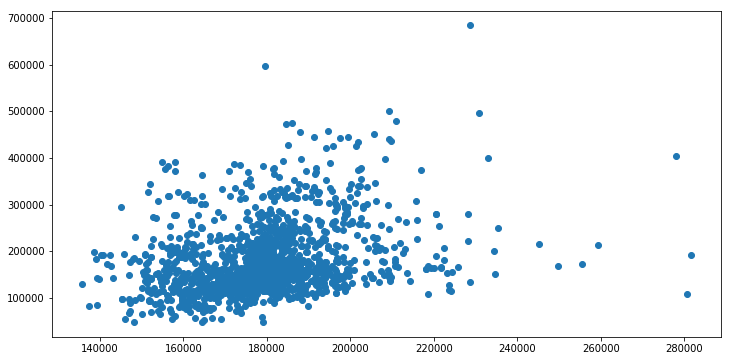

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
#plt.scatter(X_test , y_test,label = 'Test')
plt.scatter(y_test , y_pred,label = 'Predict')
plt.show

The prediction matched the actual

### 6. Communicate
Now that you have a good working model you need to communicate your results.

If this is a predict project, you may decide not to communicate details externaly, only your evaluation results.

You need to communicate how you got to the results, to customers on infer project, and internaly on predict project. 